K: 2
SSE: 152.37
Silhouette Coefficient: 0.6480
Iterations: 6

K: 3
SSE: 78.95
Silhouette Coefficient: 0.5162
Iterations: 9

K: 4
SSE: 71.34
Silhouette Coefficient: 0.3988
Iterations: 8

K: 5
SSE: 69.22
Silhouette Coefficient: 0.3686
Iterations: 5

K: 6
SSE: 45.94
Silhouette Coefficient: 0.3884
Iterations: 7

K: 7
SSE: 34.20
Silhouette Coefficient: 0.2967
Iterations: 8

K: 8
SSE: 35.92
Silhouette Coefficient: 0.2383
Iterations: 7

K: 9
SSE: 31.82
Silhouette Coefficient: 0.2751
Iterations: 13

K: 10
SSE: 30.80
Silhouette Coefficient: 0.2627
Iterations: 6



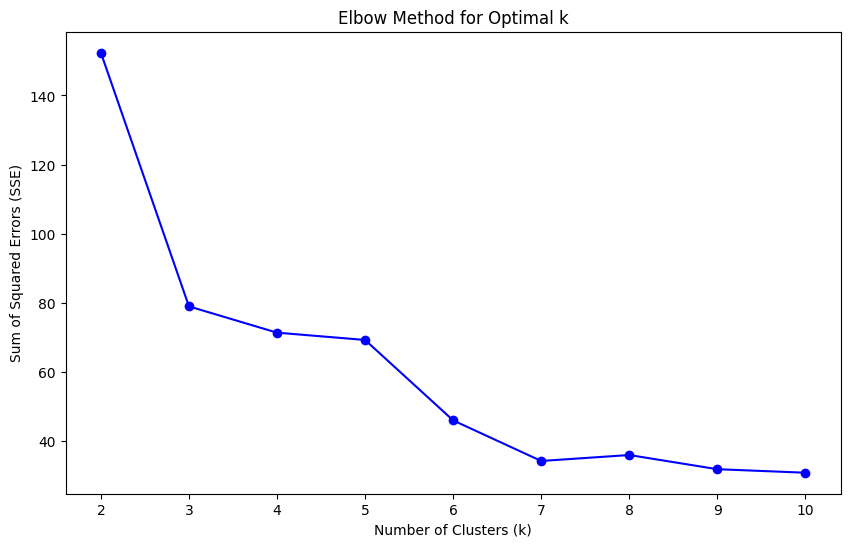

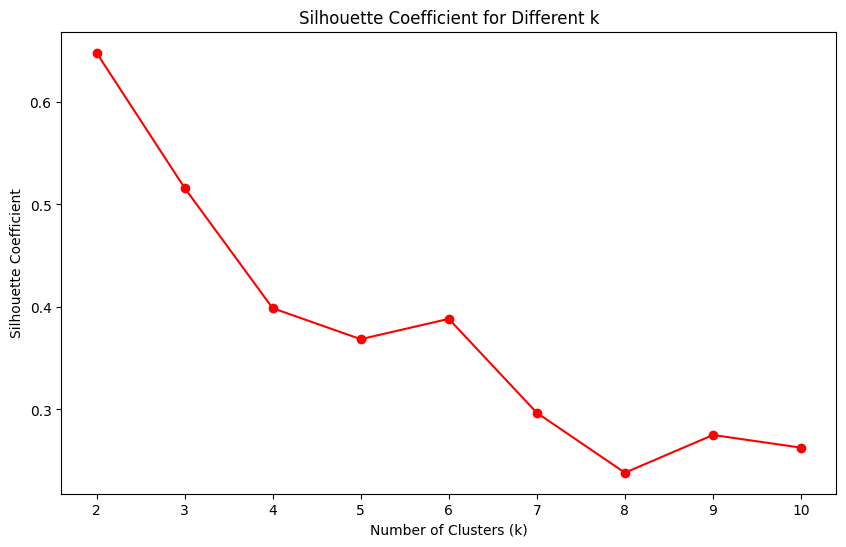

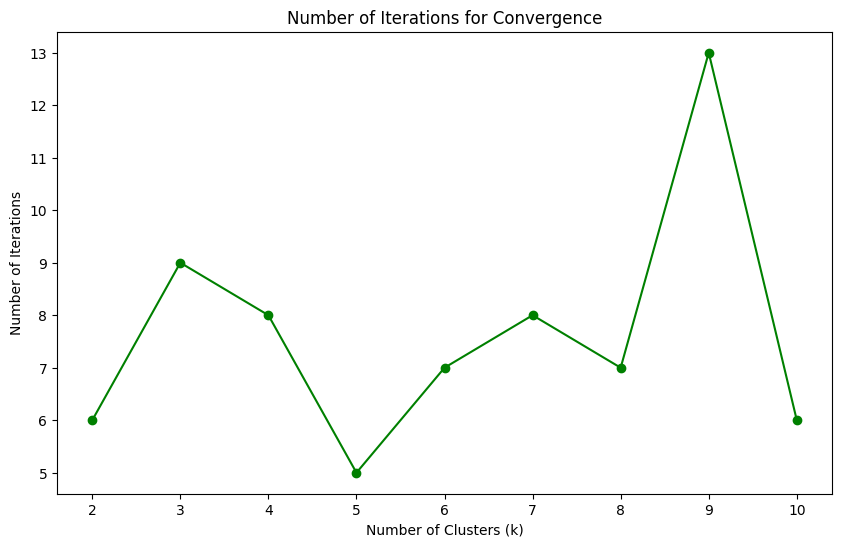

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load and prepare the data
iris = pd.read_csv('iris.csv')
X = iris.iloc[:, 1:5].values  # Exclude Id and Species columns

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

# K-means clustering implementation
def kmeans(X, k, max_iters=100):
    # Randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for iter in range(max_iters):
        # Assign points to clusters
        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)
        
        # Update centroids
        new_centroids = [np.mean(cluster, axis=0) for cluster in clusters]
        
        # Check for convergence
        if np.all([np.allclose(centroids[i], new_centroids[i]) for i in range(k)]):
            break
        
        centroids = new_centroids
    
    return centroids, clusters, iter + 1

# Function to calculate SSE
def calculate_sse(centroids, clusters):
    sse = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            sse += euclidean_distance(point, centroids[i])**2
    return sse

# Function to run K-means for different K values
def run_kmeans_analysis(X, k_values):
    results = []
    for k in k_values:
        centroids, clusters, iterations = kmeans(X, k)
        sse = calculate_sse(centroids, clusters)
        
        # Prepare data for silhouette score calculation
        labels = np.zeros(X.shape[0])
        for i, cluster in enumerate(clusters):
            for point in cluster:
                labels[np.where((X == point).all(axis=1))[0][0]] = i
        
        silhouette = silhouette_score(X, labels)
        
        results.append({
            'k': k,
            'sse': sse,
            'silhouette': silhouette,
            'iterations': iterations
        })
    
    return results

# Run analysis for K values from 2 to 10
k_values = range(2, 11)
results = run_kmeans_analysis(X, k_values)

# Print results
for result in results:
    print(f"K: {result['k']}")
    print(f"SSE: {result['sse']:.2f}")
    print(f"Silhouette Coefficient: {result['silhouette']:.4f}")
    print(f"Iterations: {result['iterations']}")
    print()

# Prepare data for plotting
k_values = [result['k'] for result in results]
sse_values = [result['sse'] for result in results]
silhouette_values = [result['silhouette'] for result in results]
iteration_values = [result['iterations'] for result in results]

# Plot SSE
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse_values, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

# Plot Silhouette Coefficient
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_values, 'ro-')
plt.title('Silhouette Coefficient for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.show()

# Plot Iterations
plt.figure(figsize=(10, 6))
plt.plot(k_values, iteration_values, 'go-')
plt.title('Number of Iterations for Convergence')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Number of Iterations')
plt.show()